<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Graphique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [16]:
#Run the file that possess data loading and cleaning to access relevant data set
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
!jupyter nbconvert --to python Project_NBA_GroupM/Analyse_Principale.ipynb
%run Project_NBA_GroupM/Analyse_Principale.py
!pip install svgpath2mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image, display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import io
import os
import xml.etree.ElementTree as ET
from svgpath2mpl import parse_path
import matplotlib.patches as patches
import tabulate as tabulate

fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
[NbConvertApp] Converting notebook Project_NBA_GroupM/Analyse_Principale.ipynb to python
[NbConvertApp] Writing 18767 bytes to Project_NBA_GroupM/Analyse_Principale.py
fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.
    Rk             Player   Age Team Pos     G    GS    MP    FG   FGA  ...  \
0  1.0      Allen Iverson  29.0  PHI  PG  75.0  75.0  42.3  10.3  24.2  ...   
1  2.0        Kobe Bryant  26.0  LAL  SG  66.0  66.0  40.7   8.7  20.1  ...   
2  3.0       LeBron James  20.0  CLE  SF  80.0  80.0  42.4   9.9  21.1  ...   
3  4.0      Dirk Nowitzki  26.0  DAL  PF  78.0  78.0  38.7   8.5  18.5  ...   
4  5.0  Amar'e Stoudemire  22.0  PHO   C  80.0  80.0  36.1   9.3  16.7  ...   

   Season       TS%  PTS_per_36  AST_per_36  TRB_per_36  STL_per_36  \
0    2005  0.532616   26.127660    6.723404    3.404255    2.042553   
1    2005  0.562256   24.412776  

,Player,Season,MVP_score
12579,Nikola Jokić,2025,99.523975
11842,Luka Don?i?,2024,99.120225
11841,Joel Embiid,2024,98.361982
7020,Russell Westbrook,2017,98.019444
11852,Nikola Joki?,2024,97.256454
10357,Nikola Jokić,2022,97.136405
8281,James Harden,2019,97.134159
2847,LeBron James,2010,96.847076
12578,Giannis Antetokounmpo,2025,96.322179
11162,Luka Dončić,2023,96.192426


<Figure size 640x480 with 0 Axes>

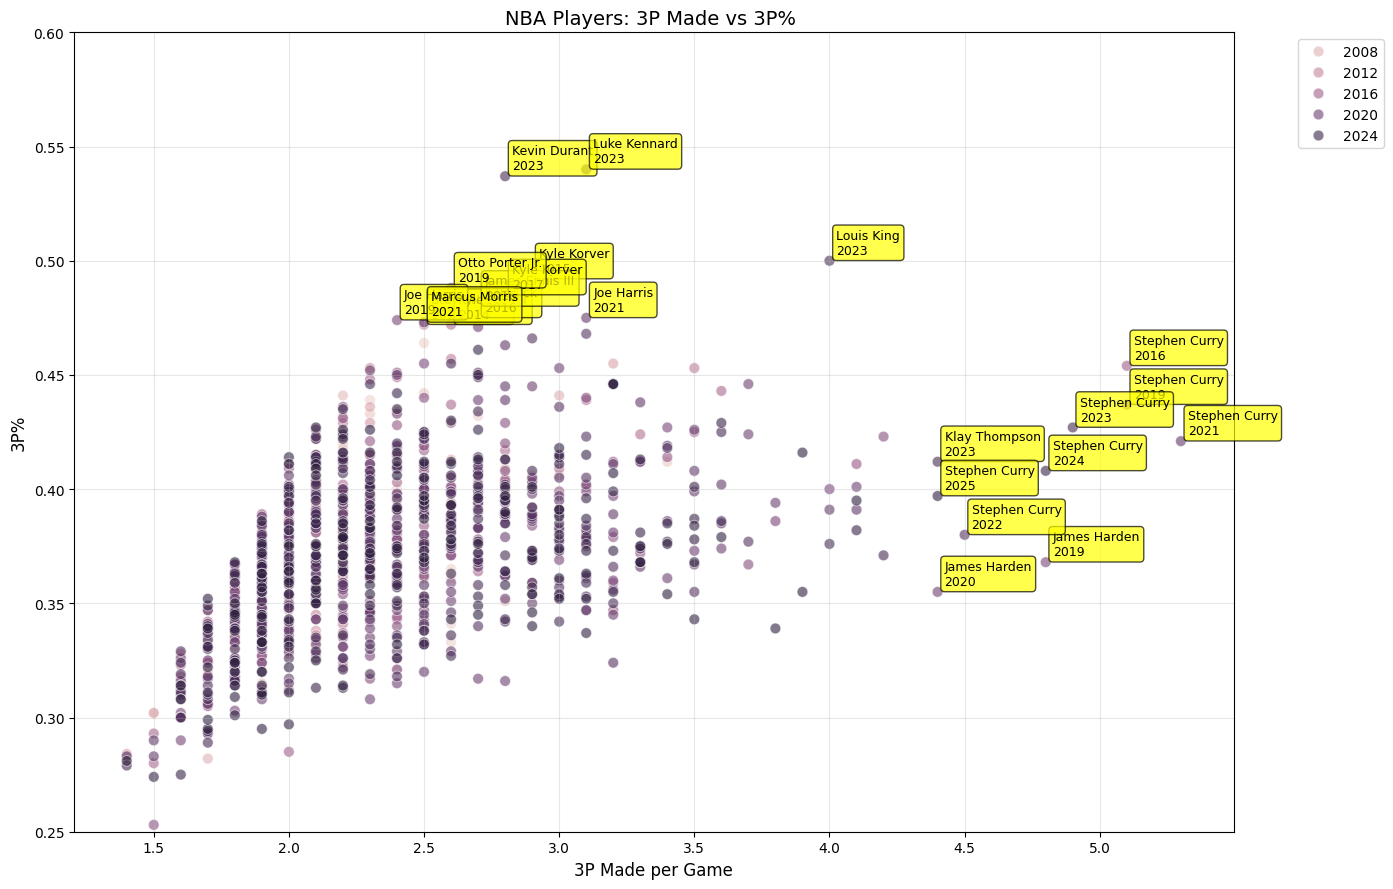

We can see that there's 2 type of outlier, the first category we will call selective
shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.
The second category are the volume shooter they still have above average accuracy
35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry


In [4]:
#3P made vs 3P% by player
df = nbas_data_full
# Select relevant columns and drop rows with missing 3P/3P%
relevant = df[['3P', '3P%', '3PA', 'Player', 'Season', 'Team']].dropna(subset=['3P', '3P%', '3PA'])
#Keeping only player who attempted more than 5 3P to filter noise created by player who doesn't shoot often
relevant = relevant[relevant['3PA'] >= 5.0]

# Filter to 25%-60% 3P% range
filtered = relevant[(relevant['3P%'] >= 0.25) & (relevant['3P%'] <= 0.60)].copy()

# Define outliers: top 10 by 3P made OR extreme 3P% within range
outliers = pd.concat([
    filtered.nlargest(10, '3P'),  # Top volume shooters
    filtered[filtered['3P%'] >= filtered['3P%'].quantile(0.99)],  # Top 1% shooters
]).drop_duplicates()

# Create the scatter plot
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(data=filtered, x='3P', y='3P%', hue='Season', alpha=0.6, s=60)

# Add outlier labels
for idx, row in outliers.iterrows():
    plt.annotate(f"{row['Player']}\n{int(row['Season'])}",
                xy=(row['3P'], row['3P%']),
                xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, ha='left')

plt.xlabel('3P Made per Game', fontsize=12)
plt.ylabel('3P%', fontsize=12)
plt.title('NBA Players: 3P Made vs 3P% ', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(0.25, 0.60)  # Lock y-axis to requested range

plt.tight_layout()
plt.show()



print("We can see that there's 2 type of outlier, the first category we will call selective")
print("shooter with high efficiency 47-54% but relatively low 3P made less than 3.5 some notable player are Kevin Durant, Luke Kennard or Kyle Korver.")
print("The second category are the volume shooter they still have above average accuracy")
print( "35-46% but high number of 3 point made more than 3.9 and up to 5.5 3PM, the face of this category is Stephen Curry")

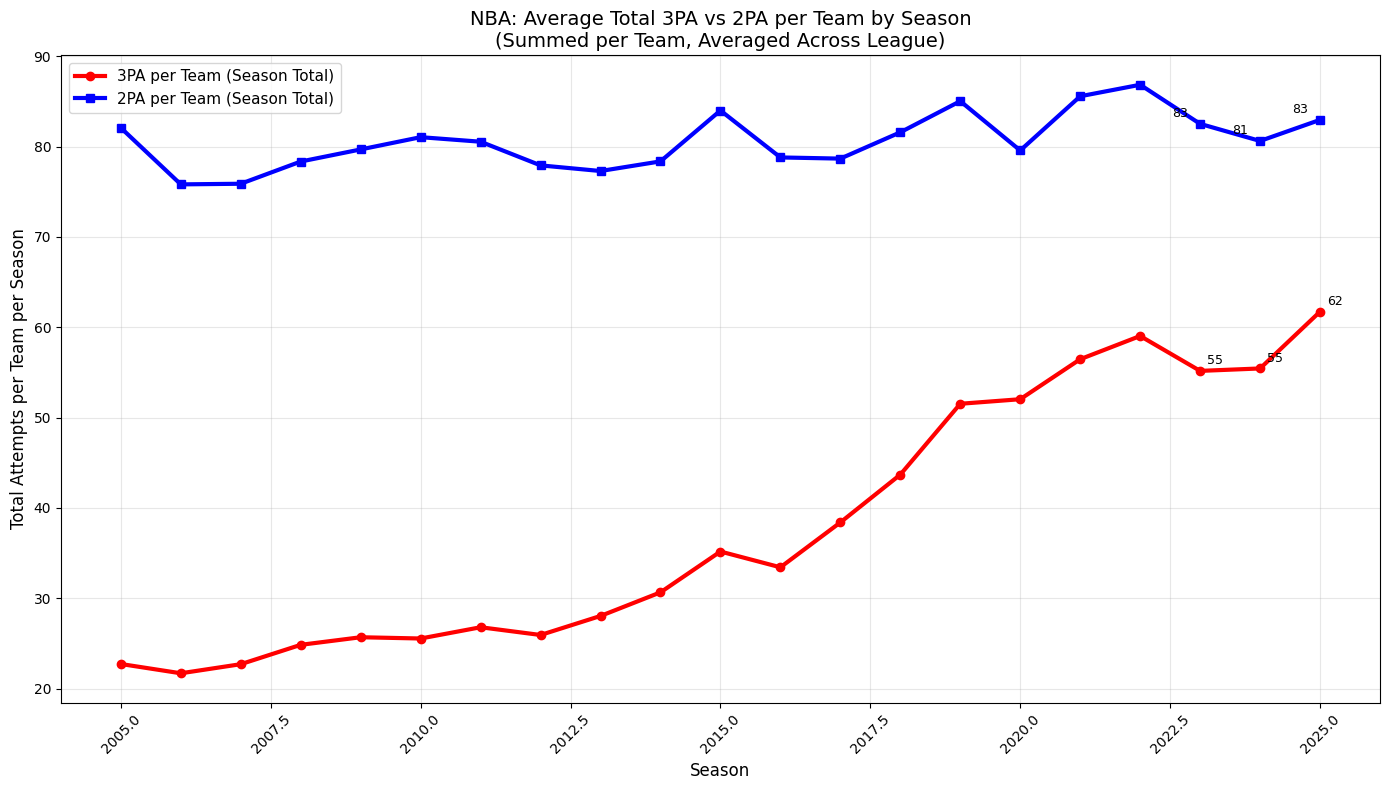

Average Total Attempts per Team by Season:
    Season  3PA  2PA
0     2005   23   82
1     2006   22   76
2     2007   23   76
3     2008   25   78
4     2009   26   80
5     2010   26   81
6     2011   27   81
7     2012   26   78
8     2013   28   77
9     2014   31   78
10    2015   35   84
11    2016   33   79
12    2017   38   79
13    2018   44   82
14    2019   52   85
15    2020   52   80
16    2021   56   86
17    2022   59   87
18    2023   55   83
19    2024   55   81
20    2025   62   83

3PA Growth: 62 in 2025 (+172% from 2005)

2PA Growth: 83 in 2025 (-1% from 2005)
Teams per season avg: 30.0


In [5]:
#Evolution of shot attempt by team
# Group by Season and Team, sum attempts per team, then average across teams per season
team_attempts = df.groupby(['Season', 'Team'])[['3PA', '2PA']].sum().reset_index()
season_team_avg = team_attempts.groupby('Season')[['3PA', '2PA']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')



# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3PA'],
         marker='o', linewidth=3, label='3PA per Team (Season Total)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2PA'],
         marker='s', linewidth=3, label='2PA per Team (Season Total)', color='blue')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Attempts per Team per Season', fontsize=12)
plt.title('NBA: Average Total 3PA vs 2PA per Team by Season\n(Summed per Team, Averaged Across League)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels on recent seasons
for i in range(-3, 0):
    plt.annotate(f'{season_team_avg["3PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3PA'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2PA"].iloc[i]:.0f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2PA'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("Average Total Attempts per Team by Season:")
print(season_team_avg[['Season', '3PA', '2PA']].round(0).astype(int))
print(f"\n3PA Growth: {season_team_avg['3PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"(+{((season_team_avg['3PA'].iloc[-1]/season_team_avg['3PA'].iloc[0]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")
print(f"\n2PA Growth: {season_team_avg['2PA'].iloc[-1]:.0f} in {season_team_avg['Season'].iloc[-1]} "
      f"({((season_team_avg['2PA'].iloc[0]/season_team_avg['2PA'].iloc[-1]-1)*100):.0f}% from {season_team_avg['Season'].iloc[0]})")
print(f"Teams per season avg: {team_attempts.groupby('Season')['Team'].nunique().mean():.1f}")

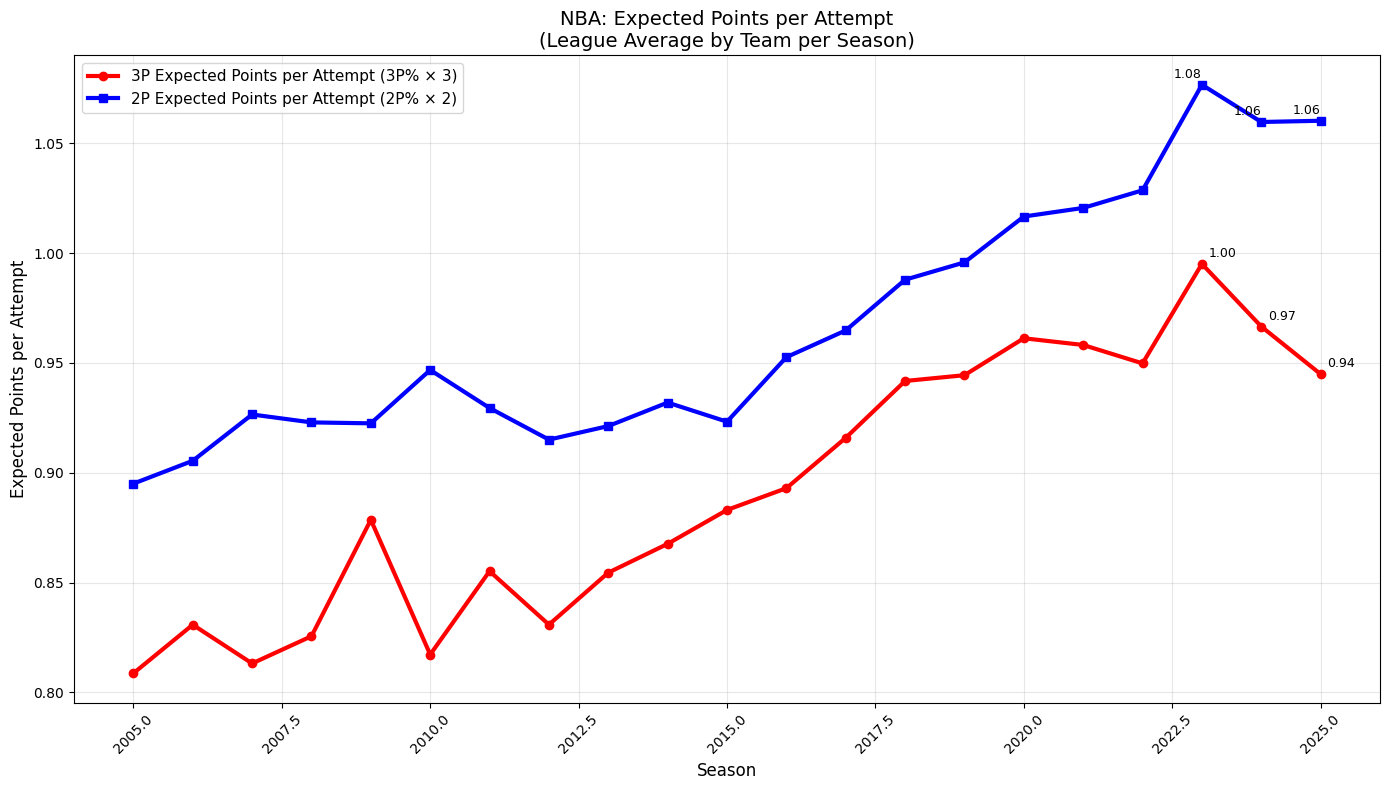

Expected Points per Attempt by Season (Avg across teams):
    Season  2P_exp_per_attempt  3P_exp_per_attempt
0     2005               0.895               0.809
1     2006               0.905               0.831
2     2007               0.927               0.813
3     2008               0.923               0.826
4     2009               0.922               0.879
5     2010               0.947               0.817
6     2011               0.929               0.855
7     2012               0.915               0.831
8     2013               0.921               0.855
9     2014               0.932               0.868
10    2015               0.923               0.883
11    2016               0.953               0.893
12    2017               0.965               0.916
13    2018               0.988               0.942
14    2019               0.996               0.944
15    2020               1.017               0.961
16    2021               1.021               0.958
17    2022              

In [6]:
#Expected point over the season by team
# Group by Season and Team, calculate expected points per attempt, then average across teams per season
team_stats = df.groupby(['Season', 'Team']).agg({
    '2P%': 'mean',
    '3P%': 'mean'
}).reset_index()

# Calculate expected points PER ATTEMPT for each shot type per team
team_stats['2P_exp_per_attempt'] = team_stats['2P%'] * 2
team_stats['3P_exp_per_attempt'] = team_stats['3P%'] * 3

# Average across teams per season
season_team_avg = team_stats.groupby('Season')[['2P_exp_per_attempt', '3P_exp_per_attempt']].mean().reset_index()
season_team_avg['Season'] = pd.to_numeric(season_team_avg['Season'], errors='coerce')
season_team_avg = season_team_avg[season_team_avg['3P_exp_per_attempt'] > 0].sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_team_avg['Season'], season_team_avg['3P_exp_per_attempt'],
         marker='o', linewidth=3, label='3P Expected Points per Attempt (3P% × 3)', color='red')
plt.plot(season_team_avg['Season'], season_team_avg['2P_exp_per_attempt'],
         marker='s', linewidth=3, label='2P Expected Points per Attempt (2P% × 2)', color='blue')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('Expected Points per Attempt', fontsize=12)
plt.title('NBA: Expected Points per Attempt\n(League Average by Team per Season)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels on recent seasons
for i in range(-3, 0):
    plt.annotate(f'{season_team_avg["3P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['3P_exp_per_attempt'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_team_avg["2P_exp_per_attempt"].iloc[i]:.2f}',
                xy=(season_team_avg['Season'].iloc[i], season_team_avg['2P_exp_per_attempt'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("Expected Points per Attempt by Season (Avg across teams):")
print(season_team_avg[['Season', '2P_exp_per_attempt', '3P_exp_per_attempt']].round(3))
print(f"\nRecent season ({season_team_avg['Season'].iloc[-1]}):")
print(f"2P: {season_team_avg['2P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P: {season_team_avg['3P_exp_per_attempt'].iloc[-1]:.3f} pts/attempt")
print(f"3P efficiency: {season_team_avg['3P_exp_per_attempt'].iloc[-1]/season_team_avg['2P_exp_per_attempt'].iloc[-1]:.2f}x 2P efficiency")

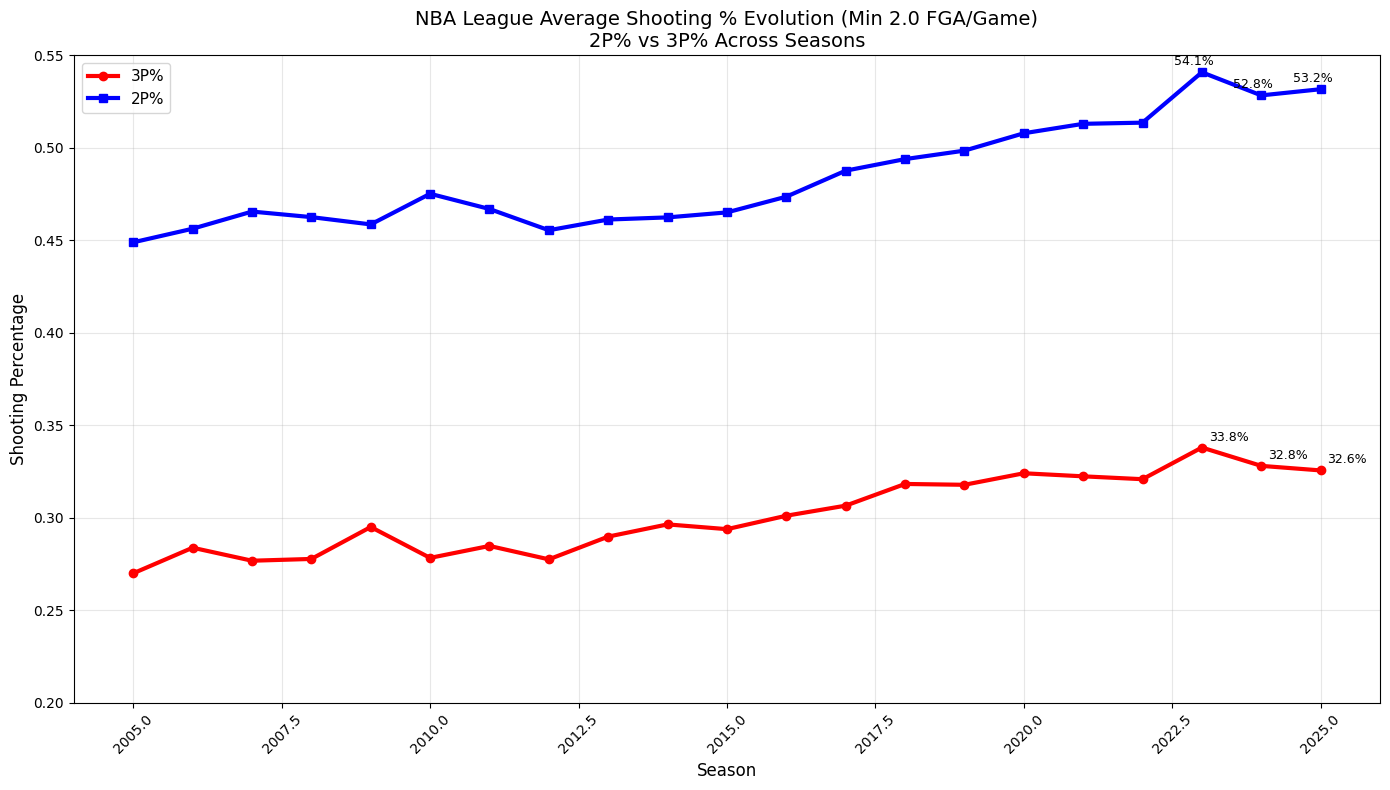

League Average Shooting % by Season (Min 2 FGA):
    Season    2P%    3P%
0     2005  0.449  0.270
1     2006  0.456  0.284
2     2007  0.466  0.277
3     2008  0.463  0.278
4     2009  0.459  0.295
5     2010  0.475  0.278
6     2011  0.467  0.285
7     2012  0.455  0.277
8     2013  0.461  0.290
9     2014  0.462  0.296
10    2015  0.465  0.294
11    2016  0.474  0.301
12    2017  0.488  0.307
13    2018  0.494  0.318
14    2019  0.498  0.318
15    2020  0.508  0.324
16    2021  0.513  0.322
17    2022  0.514  0.321
18    2023  0.541  0.338
19    2024  0.528  0.328
20    2025  0.532  0.326

Players qualified (≥2 FGA): 10,551 player-seasons
Seasons covered: 21 (2005-2025)

Recent season (2025):
2P%: 53.2%
3P%: 32.6%
3P% of 2P%: 61%
3P% improvement since 2005: +5.6 percentage points
2P% improvement since 2005: +8.3 percentage points


In [7]:
#Evolution of accuracy 2P% and 3P% by teaam
df_filtered = df[df['FGA'] >= 2.0].copy()

# Group by Season, calculate league average shooting percentages across qualified players
season_shooting = df_filtered.groupby('Season')[['2P%', '3P%']].mean().reset_index()
season_shooting['Season'] = pd.to_numeric(season_shooting['Season'], errors='coerce')
season_shooting = season_shooting.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_shooting['Season'], season_shooting['3P%'],
         marker='o', linewidth=3, label='3P%', color='red')
plt.plot(season_shooting['Season'], season_shooting['2P%'],
         marker='s', linewidth=3, label='2P%', color='blue')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('Shooting Percentage', fontsize=12)
plt.title('NBA League Average Shooting % Evolution (Min 2.0 FGA/Game)\n2P% vs 3P% Across Seasons', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ylim(0.20, 0.55)  # Focus on relevant range

# Add value labels on recent seasons
for i in range(-3, 0):
    plt.annotate(f'{season_shooting["3P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['3P%'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)
    plt.annotate(f'{season_shooting["2P%"].iloc[i]:.1%}',
                xy=(season_shooting['Season'].iloc[i], season_shooting['2P%'].iloc[i]),
                xytext=(-20, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary stats
print("League Average Shooting % by Season (Min 2 FGA):")
print(season_shooting.round(3))
print(f"\nPlayers qualified (≥2 FGA): {len(df_filtered):,} player-seasons")
print(f"Seasons covered: {len(season_shooting)} ({season_shooting['Season'].min()}-{season_shooting['Season'].max():.0f})")
print(f"\nRecent season ({season_shooting['Season'].iloc[-1]:.0f}):")
print(f"2P%: {season_shooting['2P%'].iloc[-1]:.1%}")
print(f"3P%: {season_shooting['3P%'].iloc[-1]:.1%}")
print(f"3P% of 2P%: {(season_shooting['3P%'].iloc[-1]/season_shooting['2P%'].iloc[-1]*100):.0f}%")
print(f"3P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['3P%'].iloc[-1]-season_shooting['3P%'].iloc[0])*100:.1f} percentage points")
print(f"2P% improvement since {season_shooting['Season'].iloc[0]:.0f}: +{(season_shooting['2P%'].iloc[-1]-season_shooting['2P%'].iloc[0])*100:.1f} percentage points")

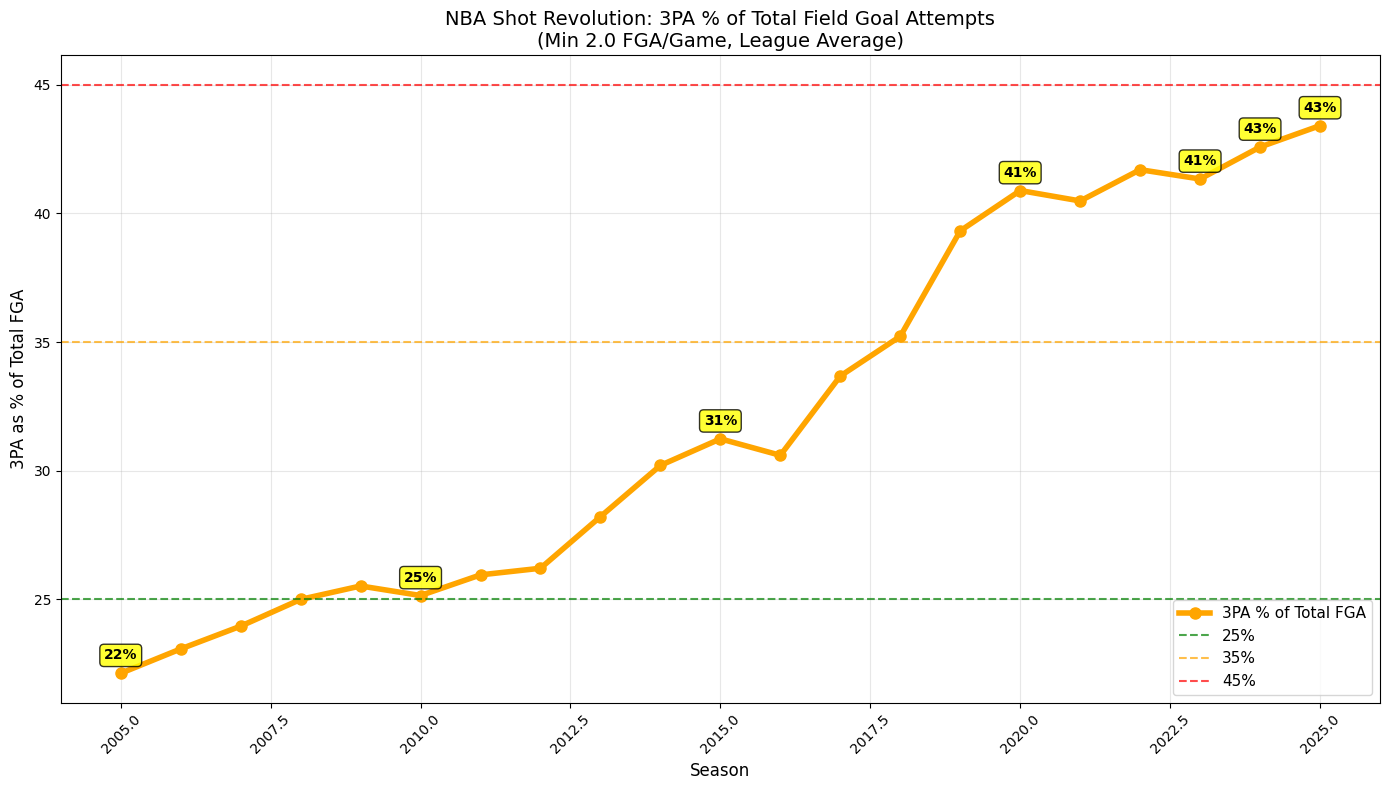

3PA/FGA Ratio Evolution (Min 2 FGA):
    Season  3PA_ratio
0     2005      0.221
1     2006      0.231
2     2007      0.240
3     2008      0.250
4     2009      0.255
5     2010      0.251
6     2011      0.259
7     2012      0.262
8     2013      0.282
9     2014      0.302
10    2015      0.312
11    2016      0.306
12    2017      0.337
13    2018      0.352
14    2019      0.393
15    2020      0.409
16    2021      0.405
17    2022      0.417
18    2023      0.413
19    2024      0.426
20    2025      0.434

Key Milestones:
2005: 22%
2010: 25%
2015: 31%
2025: 43%
Total increase: +96%
Qualified players: 10,551 player-seasons


In [8]:

# Filter out players with less than 2 FGA per game
df_filtered = df[df['FGA'] >= 2.0].copy()

# Calculate 3PA as % of total FGA for each player
df_filtered['3PA_ratio'] = df_filtered['3PA'] / df_filtered['FGA']

# Group by season and calculate league average 3PA ratio
season_ratio = df_filtered.groupby('Season')['3PA_ratio'].mean().reset_index()
season_ratio['Season'] = pd.to_numeric(season_ratio['Season'], errors='coerce')
season_ratio = season_ratio.dropna().sort_values('Season')

# Create the line plot
plt.figure(figsize=(14, 8))
plt.plot(season_ratio['Season'], season_ratio['3PA_ratio'] * 100,
         marker='o', linewidth=4, label='3PA % of Total FGA', color='orange', markersize=8)

# Add 25%, 35%, 45% reference lines
plt.axhline(y=25, color='green', linestyle='--', alpha=0.7, label='25%')
plt.axhline(y=35, color='orange', linestyle='--', alpha=0.7, label='35%')
plt.axhline(y=45, color='red', linestyle='--', alpha=0.7, label='45%')

# Customize the plot
plt.xlabel('Season', fontsize=12)
plt.ylabel('3PA as % of Total FGA', fontsize=12)
plt.title('NBA Shot Revolution: 3PA % of Total Field Goal Attempts\n(Min 2.0 FGA/Game, League Average)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add value labels every 3 years + recent seasons
label_years = [2005, 2010, 2015, 2020, 2023, 2024, 2025]
for year in label_years:
    if year in season_ratio['Season'].values:
        idx = season_ratio[season_ratio['Season'] == year].index[0]
        plt.annotate(f'{season_ratio.loc[idx, "3PA_ratio"]*100:.0f}%',
                    xy=(year, season_ratio.loc[idx, '3PA_ratio']*100),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center', fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

plt.tight_layout()
plt.show()

# Print key milestones
print("3PA/FGA Ratio Evolution (Min 2 FGA):")
print(season_ratio.round(3))
print(f"\nKey Milestones:")
print(f"2005: {season_ratio[season_ratio['Season']==2005]['3PA_ratio'].iloc[0]*100:.0f}%")
print(f"2010: {season_ratio[season_ratio['Season']==2010]['3PA_ratio'].iloc[0]*100:.0f}%")
print(f"2015: {season_ratio[season_ratio['Season']==2015]['3PA_ratio'].iloc[0]*100:.0f}%")
print(f"2025: {season_ratio['3PA_ratio'].iloc[-1]*100:.0f}%")
print(f"Total increase: +{((season_ratio['3PA_ratio'].iloc[-1]/season_ratio['3PA_ratio'].iloc[0]-1)*100):.0f}%")
print(f"Qualified players: {len(df_filtered):,} player-seasons")


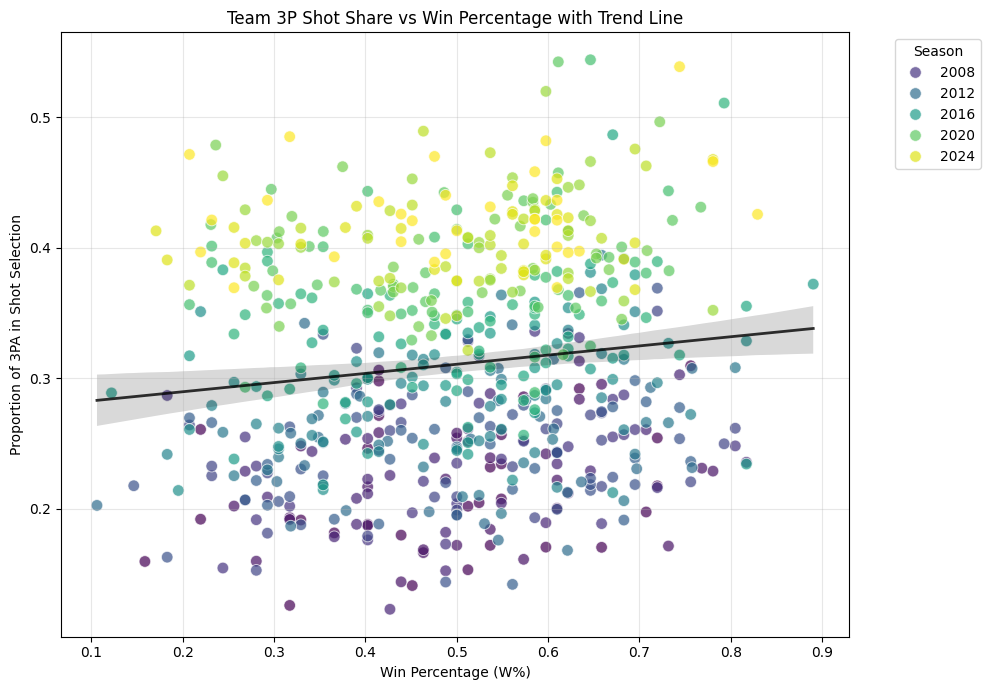

Correlation between W% and 3P shot share: 0.126


In [9]:
players = nbas_data_full
teams   = sts_data_full

# 1) Team-season 3PA, 2PA
team_shooting = (
    players
    .groupby(['Season', 'Team'])[['3PA', '2PA']]
    .mean()
    .reset_index()
)

# 2) 3P share of total FGA
team_shooting['3P_share'] = team_shooting['3PA'] / (team_shooting['3PA'] + team_shooting['2PA'])

# 3) Merge with W%
team_level = pd.merge(
    team_shooting,
    teams[['Team', 'Season', 'W%']],
    on=['Team', 'Season'],
    how='inner'
)

# 4) Scatter with global trend line
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=team_level,
    x='W%',
    y='3P_share',
    hue='Season',
    palette='viridis',
    alpha=0.7,
    s=70
)

# Add regression (trend) line over all points
sns.regplot(
    data=team_level,
    x='W%',
    y='3P_share',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'alpha': 0.8}
)

plt.xlabel('Win Percentage (W%)')
plt.ylabel('Proportion of 3PA in Shot Selection')
plt.title('Team 3P Shot Share vs Win Percentage with Trend Line')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Season')
plt.tight_layout()
plt.show()

#Computing correlation between W% and 3P shot share
corr = team_level['W%'].corr(team_level['3P_share'])
print(f"Correlation between W% and 3P shot share: {corr:.3f}")

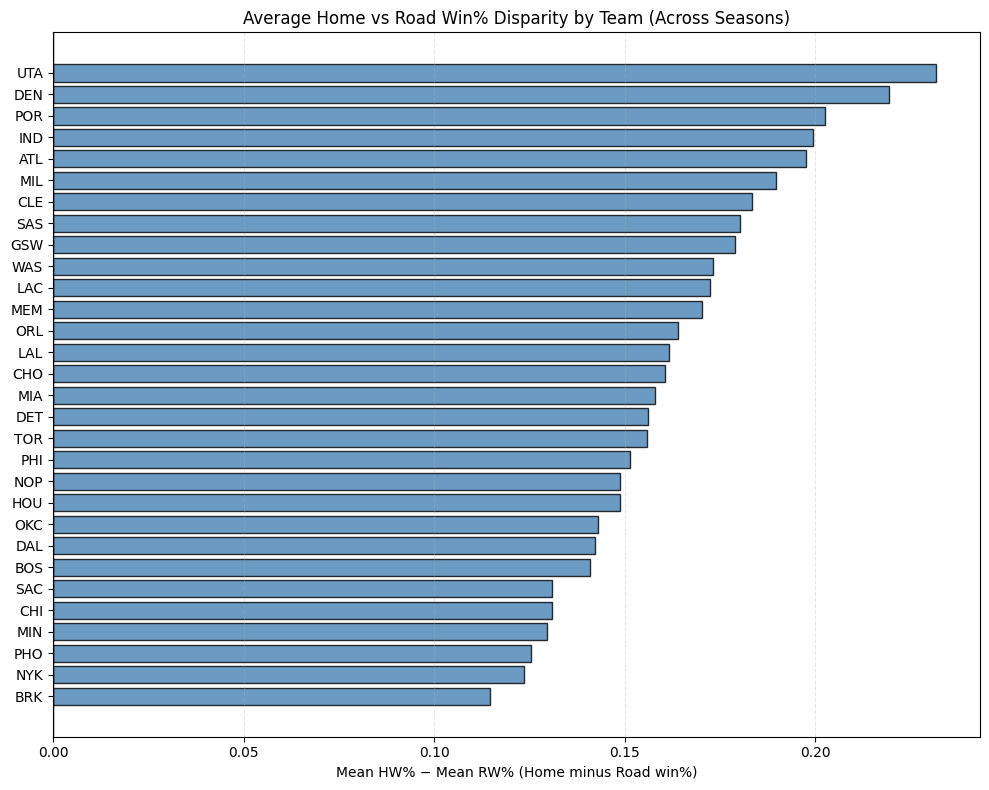

  Team    HW%    RW%  Home_Road_diff
0  UTA  0.636  0.404           0.232
1  DEN  0.691  0.472           0.219
2  POR  0.587  0.385           0.203
3  PHO  0.587  0.461           0.125
4  NYK  0.488  0.365           0.124
5  BRK  0.491  0.376           0.115


In [10]:
# Compute mean home and road W% per team across all seasons
team_mean = sts_data_full.groupby('Team')[['HW%', 'RW%']].mean().reset_index()
team_mean['Home_Road_diff'] = team_mean['HW%'] - team_mean['RW%']

# Sort by disparity
plot_df = team_mean.sort_values('Home_Road_diff')

# Diverging horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(
    plot_df['Team'],
    plot_df['Home_Road_diff'],
    color=['steelblue' if x >= 0 else 'tomato' for x in plot_df['Home_Road_diff']],
    edgecolor='black',
    alpha=0.8
)

plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Mean HW% − Mean RW% (Home minus Road win%)')
plt.title('Average Home vs Road Win% Disparity by Team (Across Seasons)')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# Mean home/road win% per team across seasons
team_mean = sts_data_full.groupby('Team')[['HW%', 'RW%']].mean().reset_index()
team_mean['Home_Road_diff'] = team_mean['HW%'] - team_mean['RW%']

# Sort by difference (descending)
team_mean_sorted = team_mean.sort_values('Home_Road_diff', ascending=False)

# Build table with top 3 and bottom 3
top3 = team_mean_sorted.head(3)
bottom3 = team_mean_sorted.tail(3)

table = pd.concat([top3, bottom3]).reset_index(drop=True)
print(table[['Team', 'HW%', 'RW%', 'Home_Road_diff']].round(3))


In [11]:
# Copy and compute home-road differential
df = sts_data_full.copy()
df['Home_Road_diff'] = df['HW%'] - df['RW%']

# Map team → multi-team city
city_map = {
    'LAL': 'Los Angeles',
    'LAC': 'Los Angeles',
    'BRK': 'New York',
    'NYK': 'New York',
    'GSW': 'Bay Area',
    'SAC': 'Bay Area'
}
df['City'] = df['Team'].map(city_map)

# Keep only mapped teams
city_df = df.dropna(subset=['City'])

# Average differential per team in those cities
result = (
    city_df
    .groupby(['City', 'Team'])['Home_Road_diff']
    .mean()
    .reset_index()
    .rename(columns={'Home_Road_diff': 'Team_mean_diff'})
)

# Difference between teams within each city (max - min)
city_span = (
    result
    .groupby('City')['Team_mean_diff']
    .agg(lambda s: s.max() - s.min())
    .reset_index()
    .rename(columns={'Team_mean_diff': 'Within_city_diff'})
)

# Merge span back to team-level table
final = result.merge(city_span, on='City', how='left')

print(final[['City', 'Team', 'Team_mean_diff', 'Within_city_diff']].round(3))

# Home–road differential per team-season
df = sts_data_full.copy()
df['Home_Road_diff'] = df['HW%'] - df['RW%']

# Mean differential per team across seasons
team_mean = (
    df.groupby('Team')['Home_Road_diff']
      .mean()
      .reset_index()
      .rename(columns={'Home_Road_diff': 'Team_mean_diff'})
)

# Average absolute pairwise distance between teams
vals = team_mean['Team_mean_diff'].values
n = len(vals)

dists = []
for i in range(n):
    for j in range(i + 1, n):
        dists.append(abs(vals[i] - vals[j]))

avg_dist = np.mean(dists)
print(f"\nAverage absolute distance between teams' (HW%−RW%) means: {avg_dist:.4f}")


          City Team  Team_mean_diff  Within_city_diff
0     Bay Area  GSW           0.179             0.048
1     Bay Area  SAC           0.131             0.048
2  Los Angeles  LAC           0.172             0.011
3  Los Angeles  LAL           0.162             0.011
4     New York  BRK           0.115             0.009
5     New York  NYK           0.124             0.009

Average absolute distance between teams' (HW%−RW%) means: 0.0333


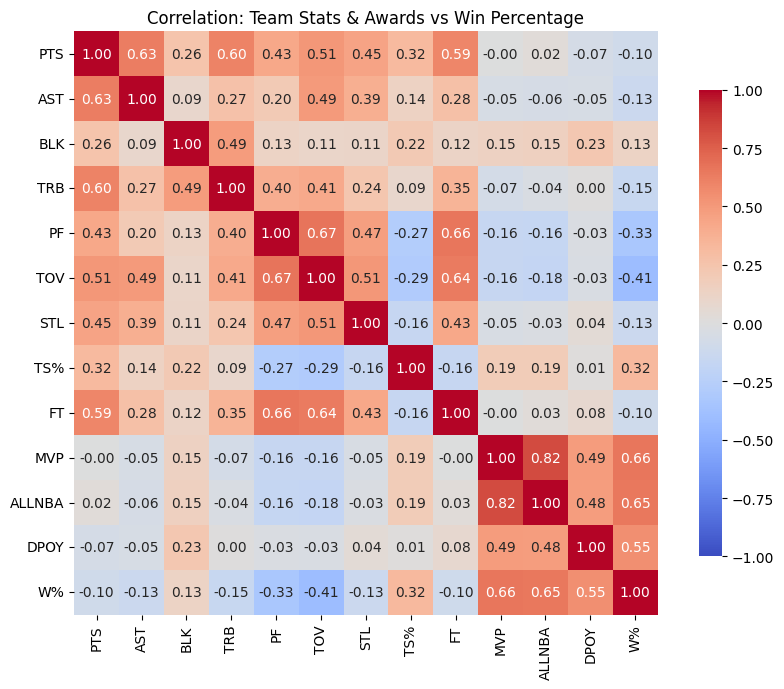

          PTS    AST    BLK    TRB     PF    TOV    STL    TS%     FT    MVP  \
PTS     1.000  0.626  0.256  0.602  0.429  0.512  0.450  0.316  0.593 -0.003   
AST     0.626  1.000  0.088  0.269  0.204  0.494  0.390  0.137  0.280 -0.055   
BLK     0.256  0.088  1.000  0.489  0.131  0.107  0.112  0.219  0.121  0.146   
TRB     0.602  0.269  0.489  1.000  0.397  0.414  0.237  0.092  0.352 -0.072   
PF      0.429  0.204  0.131  0.397  1.000  0.668  0.471 -0.275  0.664 -0.158   
TOV     0.512  0.494  0.107  0.414  0.668  1.000  0.509 -0.291  0.640 -0.161   
STL     0.450  0.390  0.112  0.237  0.471  0.509  1.000 -0.162  0.429 -0.045   
TS%     0.316  0.137  0.219  0.092 -0.275 -0.291 -0.162  1.000 -0.162  0.191   
FT      0.593  0.280  0.121  0.352  0.664  0.640  0.429 -0.162  1.000 -0.001   
MVP    -0.003 -0.055  0.146 -0.072 -0.158 -0.161 -0.045  0.191 -0.001  1.000   
ALLNBA  0.025 -0.058  0.154 -0.037 -0.164 -0.176 -0.030  0.189  0.028  0.821   
DPOY   -0.069 -0.047  0.232  0.005 -0.02

In [12]:
# 1) Team-season level stats including award counts
stats_cols = ['PTS', 'AST', 'BLK', 'TRB', 'PF', 'TOV', 'STL','FT', 'TS%', 'MVP', 'ALLNBA', 'DPOY']

team_season_stats_awards = (
    nbas_data_full
    .groupby(['Season', 'Team'])[stats_cols]
    .mean()   # sum awards per team-season; also sums box stats (you can change to mean if preferred)
    .reset_index()
)

# 2) Merge with team win% from standings
team_season_awards = (
    team_season_stats_awards
    .merge(sts_data_full[['Season', 'Team', 'W%']], on=['Season', 'Team'], how='inner')
)

# 3) Correlation matrix between stats/awards and W%
corr_cols = ['PTS', 'AST', 'BLK', 'TRB', 'PF', 'TOV', 'STL', 'TS%','FT', 'MVP', 'ALLNBA', 'DPOY', 'W%']
corr_matrix = team_season_awards[corr_cols].corr()

# 4) Heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation: Team Stats & Awards vs Win Percentage')
plt.tight_layout()
plt.show()

print(corr_matrix.round(3))


                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     58.12
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           1.75e-70
Time:                        21:05:05   Log-Likelihood:                 474.65
No. Observations:                 630   AIC:                            -931.3
Df Residuals:                     621   BIC:                            -891.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1279      0.028      4.536      0.0

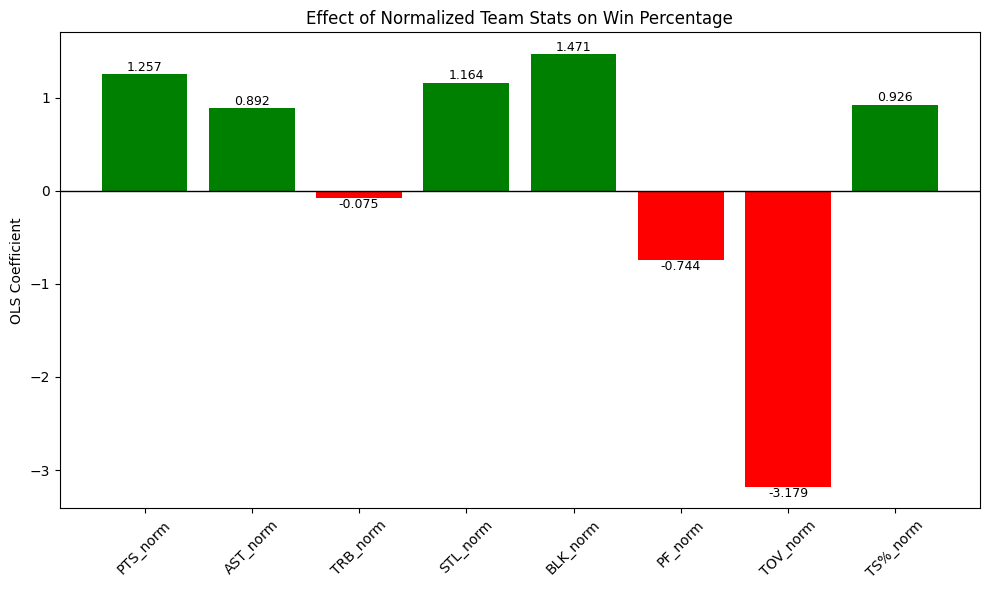

In [13]:
# Base stats to transform (TS% will be added separately)
base_stats = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'PF', 'TOV']

df = nbas_data_full.copy()

if 'TS%' not in df.columns:
    df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))

stats = base_stats + ['TS%']

# 1) Multiply each stat by G and divide by 82 (season-length scaling)
for s in stats:
    df[f'{s}_rate'] = df[s] * df['G'] / 82.0

# 2) Filter out players with less than 3 minutes per game
df = df[df['MP'] >= 3]

# 3) Normalize each transformed stat between 0 and 1 by dividing by its max
norm_cols = []
for s in stats:
    col_rate = f'{s}_rate'
    max_val = df[col_rate].max()
    norm_col = f'{s}_norm'
    df[norm_col] = df[col_rate] / max_val
    norm_cols.append(norm_col)

# 4) Group by team and season, taking mean of normalized stats
team_season = (
    df.groupby(['Season', 'Team'])[norm_cols]
      .mean()
      .reset_index()
)

# 5) Merge with win% from standings
team_season = team_season.merge(
    sts_data_full[['Season', 'Team', 'W%']],
    on=['Season', 'Team'],
    how='inner'
)

# 6) OLS regression of W% on transformed stats
X = sm.add_constant(team_season[norm_cols])
y = team_season['W%']
model = sm.OLS(y, X).fit()
print(model.summary())

# 7) Bar plot of coefficients (excluding constant)
coefs = model.params.drop('const')

plt.figure(figsize=(10, 6))
bars = plt.bar(coefs.index, coefs.values, color=['green' if c > 0 else 'red' for c in coefs.values])
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('OLS Coefficient')
plt.title('Effect of Normalized Team Stats on Win Percentage')

# Rotate labels for readability
plt.xticks(rotation=45)

# Add coefficient labels
for bar, val in zip(bars, coefs.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (0.002 if val >= 0 else -0.002),
        f'{val:.3f}',
        ha='center',
        va='bottom' if val >= 0 else 'top',
        fontsize=9
    )

plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     58.28
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           8.97e-77
Time:                        21:05:06   Log-Likelihood:                 491.71
No. Observations:                 630   AIC:                            -963.4
Df Residuals:                     620   BIC:                            -919.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1699      0.028      5.989      0.0

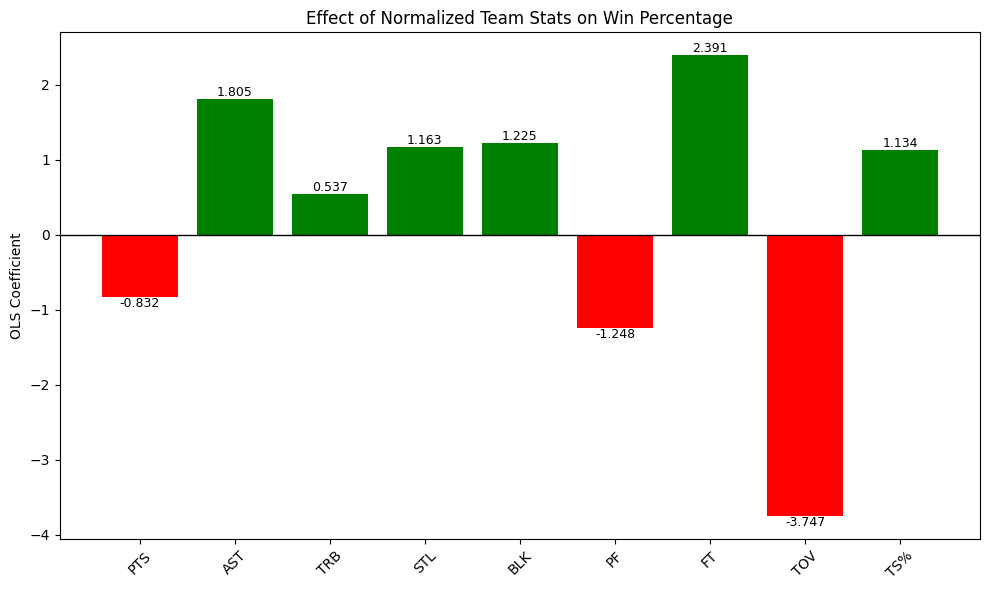

In [14]:
# Base stats to transform (TS% will be added separately)
base_stats = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'PF','FT', 'TOV']

df = nbas_data_full.copy()

# If TS% not present, approximate it from box-score stats
if 'TS%' not in df.columns:
    df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']))

stats = base_stats + ['TS%']

# 1) Multiply each stat by G and divide by 82 (season-length scaling)
for s in stats:
    df[f'{s}_rate'] = df[s] * df['G'] / 82.0

# 2) Filter out players with less than 3 minutes per game
df = df[df['MP'] >= 3]

# 3) Normalize each transformed stat between 0 and 1 by dividing by its max
norm_cols = []
for s in stats:
    col_rate = f'{s}_rate'
    max_val = df[col_rate].max()
    norm_col = f'{s}_norm'
    df[norm_col] = df[col_rate] / max_val
    norm_cols.append(norm_col)

# 4) Group by team and season, taking mean of normalized stats
team_season = (
    df.groupby(['Season', 'Team'])[norm_cols]
      .mean()
      .reset_index()
)

# 5) Merge with win% from standings
team_season = team_season.merge(
    sts_data_full[['Season', 'Team', 'W%']],
    on=['Season', 'Team'],
    how='inner'
)

# 6) OLS regression of W% on transformed stats
X = sm.add_constant(team_season[norm_cols])
y = team_season['W%']
model = sm.OLS(y, X).fit()
print(model.summary())

# 7) Bar plot of coefficients (excluding constant), with clean stat names
coefs = model.params.drop('const')

# Map from norm column names back to base stat names (remove _norm)
clean_index = [name.replace('_norm', '') for name in coefs.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(clean_index, coefs.values,
               color=['green' if c > 0 else 'red' for c in coefs.values])
plt.axhline(0, color='black', linewidth=1)
plt.ylabel('OLS Coefficient')
plt.title('Effect of Normalized Team Stats on Win Percentage')

plt.xticks(rotation=45)

# Add coefficient labels above/below bars
for bar, val in zip(bars, coefs.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (0.002 if val >= 0 else -0.002),
        f'{val:.3f}',
        ha='center',
        va='bottom' if val >= 0 else 'top',
        fontsize=9
    )

plt.tight_layout()
plt.show()


In [36]:
nbas=nbas_data_full


# Keep needed columns, including position
cols = ['Player', 'Season', 'FTA', 'FT%', 'Pos']
sub = nbas[cols].dropna(subset=['FTA'])

# Top 20 seasons by FTA
top20 = sub.sort_values('FTA', ascending=False).head(20)

# Display as a markdown table
print(tabulate(top20, headers='keys', tablefmt='github', showindex=False))


| Player                  |   Season |   FTA |   FT% | Pos   |
|-------------------------|----------|-------|-------|-------|
| Giannis Antetokounmpo   |     2023 |  12.3 | 0.645 | PF    |
| Joel Embiid             |     2022 |  11.8 | 0.814 | C     |
| James Harden            |     2020 |  11.8 | 0.865 | SG    |
| Joel Embiid             |     2023 |  11.7 | 0.857 | C     |
| Dwight Howard           |     2011 |  11.7 | 0.596 | C     |
| Allen Iverson           |     2007 |  11.6 | 0.885 | PG    |
| Joel Embiid             |     2024 |  11.6 | 0.883 | C     |
| Allen Iverson           |     2006 |  11.5 | 0.814 | PG    |
| Giannis Antetokounmpo   |     2022 |  11.4 | 0.722 | PF    |
| James Harden            |     2019 |  11   | 0.879 | PG    |
| James Harden            |     2017 |  10.9 | 0.847 | PG    |
| Dwight Howard           |     2008 |  10.9 | 0.59  | C     |
| Shai Gilgeous-Alexander |     2023 |  10.9 | 0.905 | PG    |
| Dwight Howard           |     2009 |  10.7 | 0.594 | 

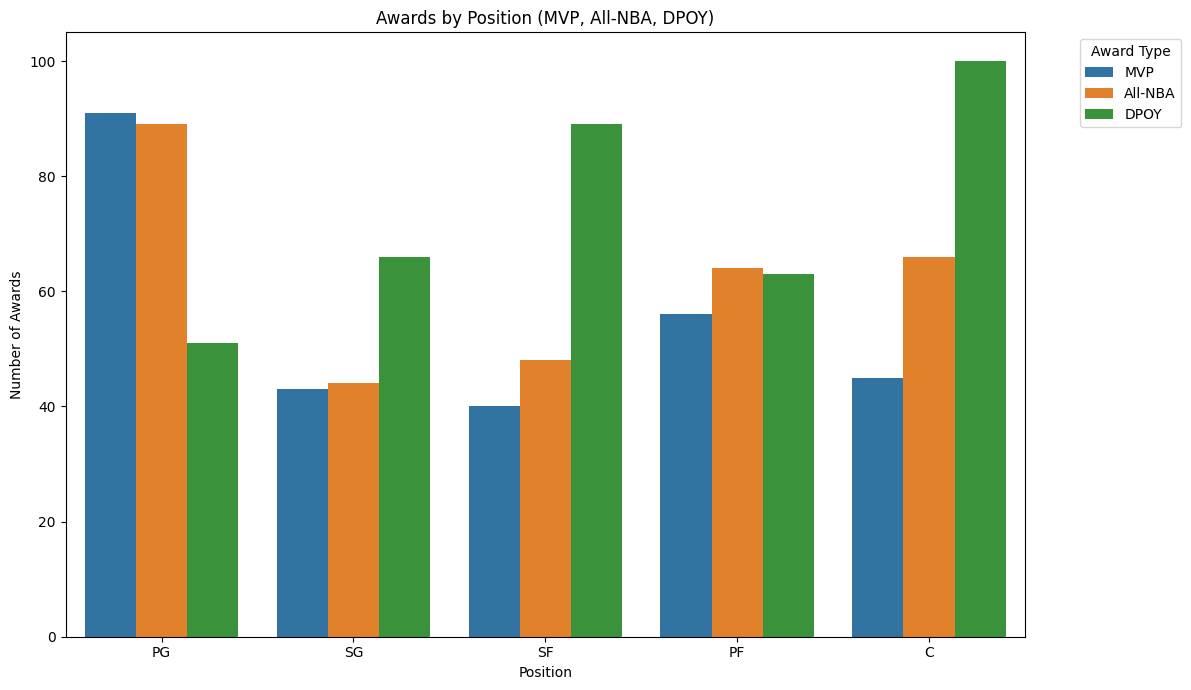

In [19]:


nbas_df=nbas_data_full


award_data = nbas_df[nbas_df[['MVP', 'ALLNBA', 'DPOY']].sum(axis=1) > 0].copy()

# Count each award type by position
mvp_counts = nbas_df[nbas_df['MVP'] == 1]['Pos'].value_counts()
allnba_counts = nbas_df[nbas_df['ALLNBA'] == 1]['Pos'].value_counts()
dpoy_counts = nbas_df[nbas_df['DPOY'] == 1]['Pos'].value_counts()

# Create combined dataframe
positions = ['PG', 'SG', 'SF', 'PF', 'C']
plot_data = pd.DataFrame({
    'Position': positions,
    'MVP': [mvp_counts.get(pos, 0) for pos in positions],
    'All-NBA': [allnba_counts.get(pos, 0) for pos in positions],
    'DPOY': [dpoy_counts.get(pos, 0) for pos in positions]
})

# Melt for seaborn
plot_melted = plot_data.melt(id_vars='Position', var_name='Award', value_name='Count')

# Create grouped barplot with legend outside
plt.figure(figsize=(12, 7))
sns.barplot(data=plot_melted, x='Position', y='Count', hue='Award')
plt.title('Awards by Position (MVP, All-NBA, DPOY)')
plt.ylabel('Number of Awards')
plt.legend(title='Award Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



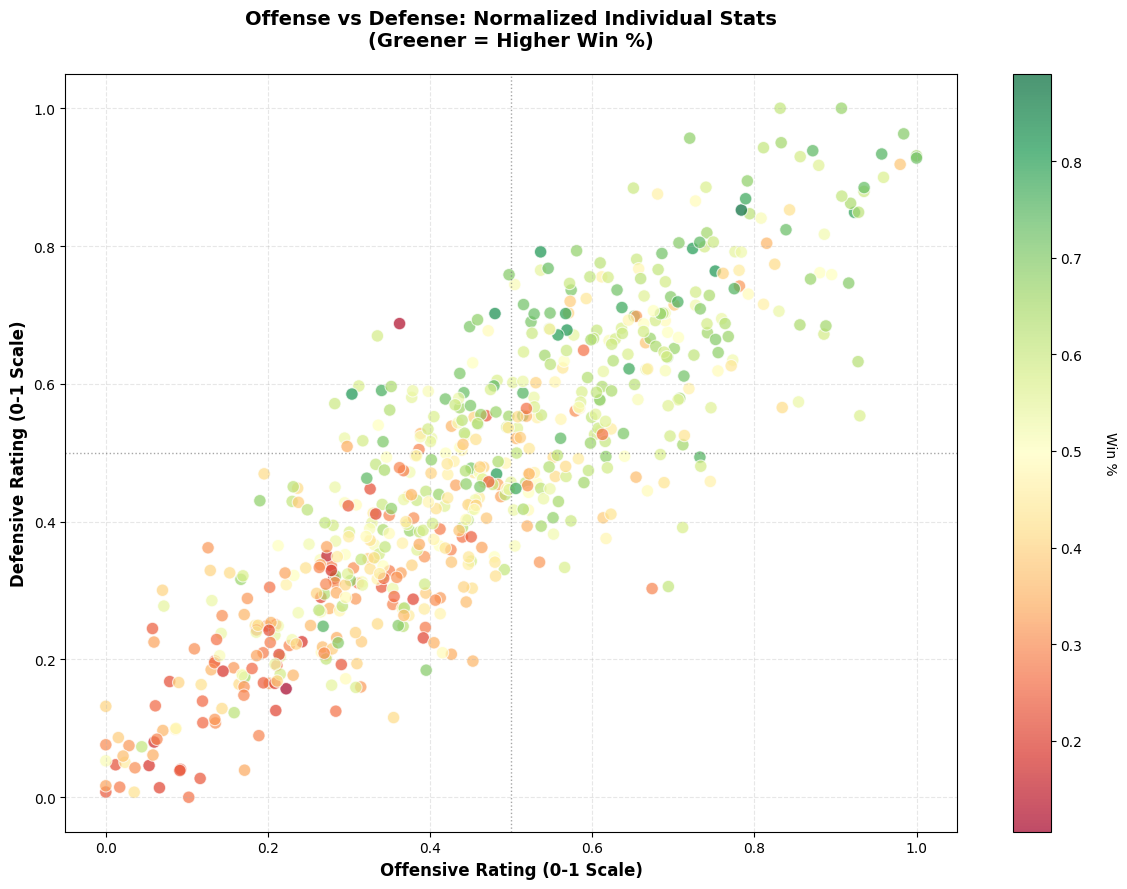

Correlations with Win % (using normalized individual stats):
Offense: 0.489
Defense: 0.557


In [30]:
# Normalize stats per 82 games and filter low-minute players
norm_data = nbas_data_full.copy()
norm_data['MP_norm'] = (norm_data['MP'] * norm_data['G']) / 82
norm_data = norm_data[norm_data['MP_norm'] >= 3].copy()

# Normalize key stats per 82 games
off_stats = ['PTS', 'AST', 'ORB','FT','TS%']
def_stats = ['STL', 'BLK', 'DRB']

for stat in off_stats + def_stats:
    norm_data[f'{stat}_norm'] = (norm_data[stat] * norm_data['G']) / 82

# Aggregate to team level
team_stats = norm_data.groupby(['Season', 'Team']).agg({
    'PTS_norm': 'mean', 'AST_norm': 'mean', 'ORB_norm': 'mean',
    'STL_norm': 'mean', 'BLK_norm': 'mean', 'DRB_norm': 'mean'
}).reset_index()

# **NORMALIZE individual stats to 0-1 BEFORE computing ratings**
for stat in ['PTS_norm', 'AST_norm', 'ORB_norm']:
    team_stats[f'{stat}_scaled'] = team_stats.groupby('Season')[stat].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))

for stat in ['STL_norm', 'BLK_norm', 'DRB_norm']:
    team_stats[f'{stat}_scaled'] = team_stats.groupby('Season')[stat].transform(
        lambda x: (x - x.min()) / (x.max() - x.min()))

# Compute ratings from ALREADY SCALED stats (equal weighting)
team_stats['Off_Rating_norm'] = (
    team_stats['PTS_norm_scaled'] +
    team_stats['AST_norm_scaled'] +
    team_stats['ORB_norm_scaled']
) / 3

team_stats['Def_Rating_norm'] = (
    team_stats['STL_norm_scaled'] +
    team_stats['BLK_norm_scaled'] +
    team_stats['DRB_norm_scaled']
) / 3

# Merge with win percentages
df_plot = pd.merge(team_stats[['Season', 'Team', 'Off_Rating_norm', 'Def_Rating_norm']],
                   sts_data_full[['Team', 'Season', 'W%']],
                   on=['Team', 'Season'])


# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 9))

scatter = ax.scatter(df_plot['Off_Rating_norm'], df_plot['Def_Rating_norm'],
                     c=df_plot['W%'],
                     cmap='RdYlGn',
                     s=80, alpha=0.7, edgecolor='white', linewidth=0.8)



cbar = plt.colorbar(scatter, ax=ax, label='Win Percentage')
cbar.set_label('Win %', rotation=270, labelpad=25)

ax.set_xlabel('Offensive Rating (0-1 Scale)', fontsize=12, fontweight='bold')
ax.set_ylabel('Defensive Rating (0-1 Scale)', fontsize=12, fontweight='bold')
ax.set_title('Offense vs Defense: Normalized Individual Stats\n(Greener = Higher Win %)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')

# Quadrant lines
ax.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)
ax.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7, linewidth=1)

plt.tight_layout()
plt.show()

# Correlation summary
print("Correlations with Win % (using normalized individual stats):")
print(f"Offense: {df_plot['Off_Rating_norm'].corr(df_plot['W%']):.3f}")
print(f"Defense: {df_plot['Def_Rating_norm'].corr(df_plot['W%']):.3f}")


In [35]:
# Display top 10 teams by Win % with their ratings
top_10_winners = df_plot.nlargest(10, 'W%')[['Season', 'Team', 'W%', 'Off_Rating_norm', 'Def_Rating_norm']].copy()
top_10_winners = top_10_winners.round({'W%': 3, 'Off_Rating_norm': 3, 'Def_Rating_norm': 3})

print("Top 10 Teams by Win Percentage:")
print(top_10_winners.to_string(index=False))

# Summary statistics for top 10
print("\nTop 10 Average Ratings:")
print(f"Offense: {top_10_winners['Off_Rating_norm'].mean():.3f}")
print(f"Defense: {top_10_winners['Def_Rating_norm'].mean():.3f}")
print(f"Win %:    {top_10_winners['W%'].mean():.3f}")

# Pretty table with tabulate (if installed)
from tabulate import tabulate
print("\nFormatted Table:")
print(tabulate(top_10_winners, headers='keys', tablefmt='grid', showindex=False))

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
off_quantiles = df_plot['Off_Rating_norm'].quantile(quantiles)
def_quantiles = df_plot['Def_Rating_norm'].quantile(quantiles)

print("\nQuantile Summary:")
print(pd.DataFrame({
    'Offense': off_quantiles.round(3),
    'Defense': def_quantiles.round(3)
}))

Top 10 Teams by Win Percentage:
 Season Team    W%  Off_Rating_norm  Def_Rating_norm
   2016  GSW 0.890            0.784            0.852
   2025  OKC 0.829            0.480            0.702
   2007  DAL 0.817            0.569            0.678
   2015  GSW 0.817            0.752            0.764
   2016  SAS 0.817            0.304            0.585
   2017  GSW 0.817            0.536            0.792
   2008  BOS 0.805            0.558            0.671
   2009  CLE 0.805            0.482            0.469
   2013  MIA 0.805            0.724            0.796
   2009  LAL 0.793            0.924            0.849

Top 10 Average Ratings:
Offense: 0.611
Defense: 0.716
Win %:    0.819

Formatted Table:
+----------+--------+-------+-------------------+-------------------+
|   Season | Team   |    W% |   Off_Rating_norm |   Def_Rating_norm |
+==========+========+=======+===================+===================+
|     2016 | GSW    | 0.89  |             0.784 |             0.852 |
+----------+----